# Probability Distirbutions

##### The variance is the spread of the values of a random variable from the mean. This is typically denoted as a function V ar; for example, V ar(X) is the variance of the random variable X or V ar(f (x)) for the variance of values drawn from the domain of X using the function f (). The square root of the variance normalizes the value and is referred to as the standard deviation. The variance between two variables is called the covariance and summarizes the linear relationship for how two random variables change together.

- Expected Value. The average value of a random variable.
- Variance. The average spread of values around the expected value.

## Discrete Probability Distributions
#### A discrete probability distribution summarizes the probabilities for a discrete random variable. The probability mass function, or PMF, defines the probability distribution for a discrete random variable. It is a function that assigns a probability for specific discrete values. A discrete probability distribution has a cumulative distribution function, or CDF. This is a function that assigns a probability that a discrete random variable will have a value of less than or equal to a specific discrete value.

- Probability Mass Function. Probability for a value for a discrete random variable.
- Cumulative Distribution Function. Probability less than or equal to a value for a
random variable.

## Continuous Probability Distributions
#### A continuous probability distribution summarizes the probability for a continuous random variable. The probability distribution function, or PDF, defines the probability distribution for a continuous random variable. Note the difference in the name from the discrete random variable that has a probability mass function, or PMF. Like a discrete probability distribution, the continuous probability distribution also has a cumulative distribution function, or CDF, that defines the probability of a value less than or equal to a specific numerical value from the domain.

- Probability Distribution Function. Probability for a value for a continuous random variable.
- Cumulative Distribution Function. Probability less than or equal to a value for a random variable.

In [5]:
# example of simulating a binomial process and counting success
from numpy.random import binomial
import numpy as np
# define the parameters of the distribution 
p = 0.3
k = 100
# run a single simulation
success = binomial(k, p)
print('Total Success: %d' % success)

Total Success: 33


In [6]:
# calculate moments of a binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# calculate moments
mean, var, _, _ = binom.stats(k, p, moments='mvsk') 
print('Mean=%.3f, Variance=%.3f' % (mean, var))
print("Sqrt", np.sqrt(var))


Mean=30.000, Variance=21.000
Sqrt 4.58257569495584


#### We can calculate the moments of this distribution, specifically the expected value or mean and the variance using the binom.stats() SciPy function. Running the example reports the expected value of the distribution, which is 30, as we would expect, as well as the variance of 21, which if we calculate the square root, gives us the standard deviation of about 4.5.


#### We can use the probability mass function to calculate the likelihood of different numbers of successful outcomes for a sequence of trials, such as 10, 20, 30, to 100. We would expect 30 successful outcomes to have the highest probability.

In [8]:
# define the parameters of the distribution
p = 0.3
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
for n in range(10, 110, 10):
  print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))

P of 10 success: 0.000%
P of 20 success: 0.758%
P of 30 success: 8.678%
P of 40 success: 0.849%
P of 50 success: 0.001%
P of 60 success: 0.000%
P of 70 success: 0.000%
P of 80 success: 0.000%
P of 90 success: 0.000%
P of 100 success: 0.000%


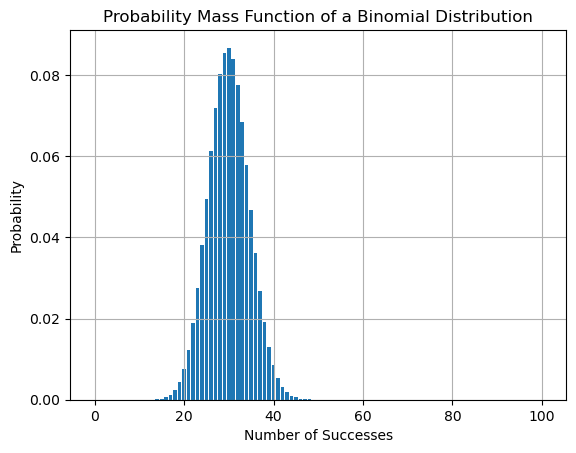

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of possible number of successes from 0 to k
x = np.arange(0, k+1)
pmf = dist.pmf(x)

plt.bar(x, pmf)
plt.title('Probability Mass Function of a Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


#### The PMF (Probability Mass Function) function is used to calculate the likelihood or probability of achieving a specific number of successes, which you specify as an input to the function, in a given number of trials (defined by the binomial distribution parameters).

In [10]:
# example of using the cdf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of <=n successes
for n in range(10, 110, 10):
  print('P of %d success: %.3f%%' % (n, dist.cdf(n)*100))

P of 10 success: 0.000%
P of 20 success: 1.646%
P of 30 success: 54.912%
P of 40 success: 98.750%
P of 50 success: 99.999%
P of 60 success: 100.000%
P of 70 success: 100.000%
P of 80 success: 100.000%
P of 90 success: 100.000%
P of 100 success: 100.000%


## Why Use the CDF?
- The CDF is particularly useful when you need to understand the probability of achieving a result within a certain range. For instance, in quality control or risk management, you might want to know the likelihood of achieving no more than a certain number of defects or failures.

## Summary
- The CDF provides cumulative probabilities, offering a broader view of the likelihood of outcomes up to a specified threshold. It's an essential function for probability distributions as it helps in understanding the spread and tendencies of the data or outcomes in probabilistic terms.

#### Using the Cumulative Distribution Function (CDF)
- The CDF is used when you are interested in probabilities up to and including a certain value. It is helpful when:

- Range of Outcomes: You need the probability of an event occurring within a range of outcomes. For example, you might want to know the probability of a project taking up to 30 days to complete or the probability of a store receiving up to 100 customers in a day.
- Less Than or Equal Queries: When your question involves conditions of "less than or equal to" (≤), the CDF directly provides this cumulative probability.

- Example Scenario: If you want to assess the risk of a new product failing to meet sales targets, and you need to know the probability that it will sell fewer than 500 units in the first month, you would use the CDF.

## Using the Probability Mass Function (PMF)
- The PMF is used when you want to find the probability of the random variable being exactly equal to a specific value. This is particularly useful when:

- Specific Outcomes: You need the probability of an event occurring in exactly a specific way, such as the probability of a die rolling a six, or the probability of exactly 15 customers arriving in an hour.
- Discrete Events: The PMF is applicable only to discrete random variables, where outcomes can be distinctly listed out (e.g., number of heads in coin tosses).

## Multinomial Distribution

In [11]:
# example of simulating a multinomial process
from numpy.random import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100

# run a single simulation
cases = multinomial(k, p)
# summarize cases
for i in range(len(cases)):
  print('Case %d: %d' % (i+1, cases[i]))

Case 1: 35
Case 2: 30
Case 3: 35


In [12]:

# calculate the probability for a given number of events of each type
from scipy.stats import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# define the distribution
dist = multinomial(k, p)
# define a specific number of outcomes from 100 trials cases = [33, 33, 34]
# calculate the probability for the case
pr = dist.pmf(cases)
# print as a percentage
print('Case=%s, Probability: %.3f%%' % (cases, pr*100))

Case=[35 30 35], Probability: 0.639%


In [13]:

# sample a normal distribution
from numpy.random import normal
# define the distribution
mu = 50
sigma = 5
n = 10
# generate the sample
sample = normal(mu, sigma, n)
print(sample)


[45.72926362 41.59623883 56.29828158 46.708153   53.36089589 50.14897621
 46.31904146 43.99036064 44.73969398 54.25166304]


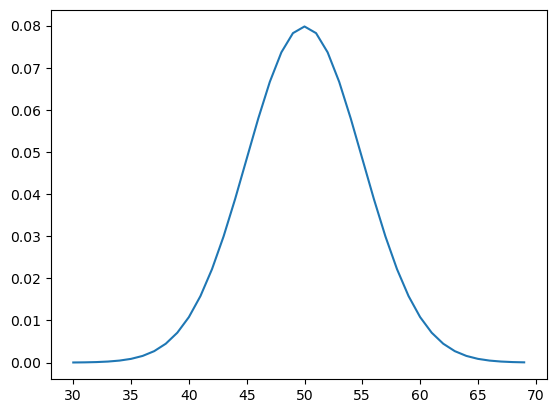

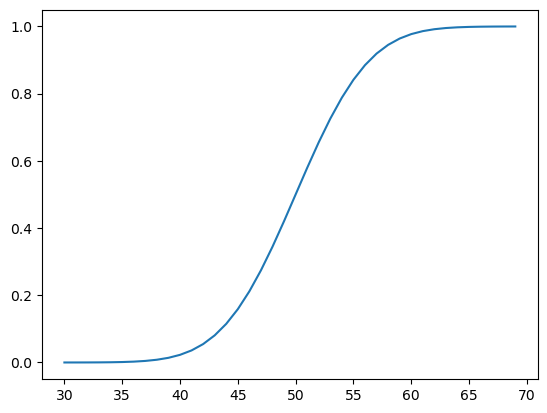

In [14]:

# pdf and cdf for a normal distribution
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = 50
sigma = 5

# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
# plot cdf
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()


In [15]:
# calculate the values that define the middle 95%
from scipy.stats import norm
# define distribution parameters
mu = 50
sigma = 5
# create distribution
dist = norm(mu, sigma)
low_end = dist.ppf(0.025)
high_end = dist.ppf(0.975)
print('Middle 95%% between %.1f and %.1f' % (low_end, high_end))

Middle 95% between 40.2 and 59.8


## Exponential Distribution
#### The exponential distribution is a continuous probability distribution where a few outcomes are the most likely with a rapid decrease in probability to all other outcomes. It is the continuous random variable equivalent to the geometric probability distribution for discrete random variables. Some examples of domains that have exponential distribution events include:

- The time between clicks on a Geiger counter.
- The time until the failure of a part.
- The time until the default of a loan.